In [21]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

In [22]:
main_path="C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\"
open_folder = os.listdir(main_path)
Data_base_learning = main_path+open_folder[3]
Data_base_learning_v2 = main_path+open_folder[4]
path2 = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\"
open_folder1= os.listdir(path2)
Data_train = path2+open_folder1[10]
Data_test = path2+open_folder1[9]
print(open_folder1)
print(Data_test)

['.DS_Store', '.ipynb_checkpoints', '2014', '2015', '2016', '2017', '2018', 'All_years', 'Data_API.ipynb', 'Data_Test_Foot.csv', 'Data_Train_Foot.csv', 'Points_Equipe_Hist', 'Points_Equipe_Hist_VF', 'Recup_Data_Historical.ipynb', 'Teams_puiss.csv', 'Web_Score.ipynb']
C:\Users\Amrta\Documents\GitHub\projetannuel4IABD2\ETAPE_3\Scripts_Recup_Data\Projet_Annuel_Data\Data_Test_Foot.csv


Machine Amrta

In [23]:
filename = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Train_Foot.csv"
filename_test= 'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Test_Foot.csv'

Machine Dylane

In [24]:
# filename = 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Train_Foot.csv'
# filename_test= 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Test_Foot.csv

In [25]:
# Chargement des données csv
data= pd.read_csv(filename,sep=";",index_col=0)
data
# y prend le score à prédire
y=data.mi_temps_gagnante
data.head()

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2409,6154
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4008,3054
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3029,4815
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2803,2045
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2156,1065


In [26]:
np.unique(y)

array([0, 1, 2], dtype=int64)

In [27]:
x=data[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1424,2020-07-01,FINISHED,279508,ACF Fiorentina,US Sassuolo Calcio,99,471,2679,3086,1.214286,1.714286,1.392857,1.750000
1085,2020-07-01,FINISHED,273889,Real Betis Balompié,Villarreal CF,90,94,8949,5396,1.343750,1.593750,1.625000,1.250000
1423,2020-07-01,FINISHED,279512,Bologna FC 1909,Cagliari Calcio,103,104,3818,2866,1.428571,1.678571,1.607143,1.571429
1983,2020-07-01,FINISHED,274431,Sporting Clube de Portugal,Gil Vicente FC,498,5533,5314,1346,1.607143,1.071429,1.035714,1.250000
1982,2020-07-01,FINISHED,274433,Os Belenenses Futebol,CD Tondela,5568,1049,1589,1729,0.857143,0.821429,1.571429,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,2.000000,1.566667,1.166667,1.000000
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.966667,1.633333,1.200000,1.066667
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.806452,0.774194,1.354839,1.903226


In [28]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9238, 6) (9238,)
3


array([2, 1, 2, ..., 0, 2, 2])

In [29]:
def create_model():
    
    model = Sequential()
    model.add(Dense(3, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(1024, input_dim=x_train.shape[1], activation='relu')) 
    model.add(Dense(524, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(1024, input_dim=x_train.shape[1], activation='relu'))   
    model.add(BatchNormalization())
    model.add(Dropout(0.05))
    model.add(Dense(nbClasses, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [30]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_8 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              132096    
_________________________________________________________________
dense_10 (Dense)             (None, 524)               537100    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               67200     
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              132096    
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)             

In [31]:
save = ModelCheckpoint('model_Foot_mi_temps.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [32]:
history = model.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=200,
                    callbacks = [save])

Train on 9238 samples, validate on 2310 samples
Epoch 1/200
9180/9238 [============================>.] - ETA: 0s - loss: 1.1041 - accuracy: 0.4155 - 
Epoch 00001: val_accuracy improved from -inf to 0.25455, saving model to model_Foot_mi_temps.h5
9238/9238 [==============================] - 3s 308us/sample - loss: 1.1036 - accuracy: 0.4162 - val_loss: 16.9109 - val_accuracy: 0.2545
Epoch 2/200
9000/9238 [============================>.] - ETA: 0s - loss: 1.0915 - accuracy: 0.4247
Epoch 00002: val_accuracy did not improve from 0.25455
9238/9238 [==============================] - 2s 202us/sample - loss: 1.0913 - accuracy: 0.4241 - val_loss: 23.9903 - val_accuracy: 0.2472
Epoch 3/200
9180/9238 [============================>.] - ETA: 0s - loss: 1.0907 - accuracy: 0.4236 ETA: 0s - loss: 1.0857 - 
Epoch 00003: val_accuracy improved from 0.25455 to 0.43810, saving model to model_Foot_mi_temps.h5
9238/9238 [==============================] - 2s 200us/sample - loss: 1.0907 - accuracy: 0.4239 - val

9090/9238 [============================>.] - ETA: 0s - loss: 1.0936 - accuracy: 0.4228
Epoch 00056: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 2s 225us/sample - loss: 1.0929 - accuracy: 0.4237 - val_loss: 1.0817 - val_accuracy: 0.3948
Epoch 57/200
9180/9238 [============================>.] - ETA: 0s - loss: 1.0832 - accuracy: 0.4290 ETA: 1s - los - ETA: 0s - loss: 1.0874 - ac
Epoch 00057: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 2s 238us/sample - loss: 1.0831 - accuracy: 0.4290 - val_loss: 1.0979 - val_accuracy: 0.4437
Epoch 58/200
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0711 - accuracy: 0.4387
Epoch 00058: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 2s 230us/sample - loss: 1.0714 - accuracy: 0.4385 - val_loss: 1.0897 - val_accuracy: 0.4290
Epoch 59/200
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0768 - accuracy: 

Epoch 84/200
9000/9238 [============================>.] - ETA: 0s - loss: 1.0748 - accuracy: 0.4341 ETA: 0s - loss: 1.0760 - accura
Epoch 00084: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 2s 248us/sample - loss: 1.0745 - accuracy: 0.4341 - val_loss: 1.0748 - val_accuracy: 0.4251
Epoch 85/200
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0721 - accuracy: 0.4352
Epoch 00085: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 2s 229us/sample - loss: 1.0720 - accuracy: 0.4351 - val_loss: 1.0820 - val_accuracy: 0.4437
Epoch 86/200
9000/9238 [============================>.] - ETA: 0s - loss: 1.0662 - accuracy: 0.4457
Epoch 00086: val_accuracy did not improve from 0.44372
9238/9238 [==============================] - 2s 229us/sample - loss: 1.0656 - accuracy: 0.4454 - val_loss: 1.0682 - val_accuracy: 0.4338
Epoch 87/200
9000/9238 [============================>.] - ETA: 0s - loss: 1.0731 - accuracy:

Epoch 112/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0686 - accuracy: 0.4413
Epoch 00112: val_accuracy did not improve from 0.44416
9238/9238 [==============================] - 2s 230us/sample - loss: 1.0683 - accuracy: 0.4420 - val_loss: 1.0736 - val_accuracy: 0.4290
Epoch 113/200
9000/9238 [============================>.] - ETA: 0s - loss: 1.0699 - accuracy: 0.4350
Epoch 00113: val_accuracy did not improve from 0.44416
9238/9238 [==============================] - 2s 236us/sample - loss: 1.0706 - accuracy: 0.4340 - val_loss: 1.0676 - val_accuracy: 0.4437
Epoch 114/200
9000/9238 [============================>.] - ETA: 0s - loss: 1.0660 - accuracy: 0.4429
Epoch 00114: val_accuracy did not improve from 0.44416
9238/9238 [==============================] - 2s 259us/sample - loss: 1.0660 - accuracy: 0.4426 - val_loss: 1.0829 - val_accuracy: 0.4437
Epoch 115/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0712 - accuracy: 0.4411
Epoch 00115: val_acc

Epoch 140/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0672 - accuracy: 0.4437
Epoch 00140: val_accuracy did not improve from 0.44416
9238/9238 [==============================] - 2s 230us/sample - loss: 1.0670 - accuracy: 0.4439 - val_loss: 4.4214 - val_accuracy: 0.4437
Epoch 141/200
9000/9238 [============================>.] - ETA: 0s - loss: 1.0653 - accuracy: 0.4418 ETA: 0s - loss: 1.0
Epoch 00141: val_accuracy did not improve from 0.44416
9238/9238 [==============================] - 2s 226us/sample - loss: 1.0648 - accuracy: 0.4434 - val_loss: 1.0731 - val_accuracy: 0.4437
Epoch 142/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0674 - accuracy: 0.4424
Epoch 00142: val_accuracy did not improve from 0.44416
9238/9238 [==============================] - 2s 223us/sample - loss: 1.0675 - accuracy: 0.4418 - val_loss: 1.0927 - val_accuracy: 0.4177
Epoch 143/200
9000/9238 [============================>.] - ETA: 0s - loss: 1.0699 - accuracy: 0.4318


Epoch 176/200
9180/9238 [============================>.] - ETA: 0s - loss: 1.0649 - accuracy: 0.4447
Epoch 00176: val_accuracy did not improve from 0.44416
9238/9238 [==============================] - 2s 237us/sample - loss: 1.0650 - accuracy: 0.4448 - val_loss: 1.0707 - val_accuracy: 0.4437
Epoch 177/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0619 - accuracy: 0.4447
Epoch 00177: val_accuracy did not improve from 0.44416
9238/9238 [==============================] - 2s 238us/sample - loss: 1.0621 - accuracy: 0.4454 - val_loss: 1.0702 - val_accuracy: 0.4437
Epoch 178/200
9000/9238 [============================>.] - ETA: 0s - loss: 1.0634 - accuracy: 0.4462
Epoch 00178: val_accuracy did not improve from 0.44416
9238/9238 [==============================] - 2s 232us/sample - loss: 1.0633 - accuracy: 0.4465 - val_loss: 1.0678 - val_accuracy: 0.4437
Epoch 179/200
9090/9238 [============================>.] - ETA: 0s - loss: 1.0626 - accuracy: 0.4454
Epoch 00179: val_acc

Text(0, 0.5, 'Accuracy')

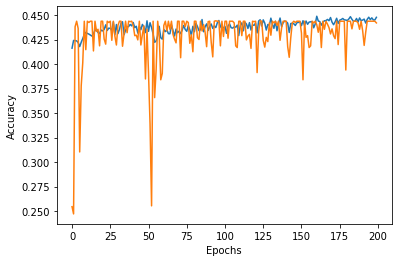

In [33]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prédiction

In [34]:
unique = x_prediction.values
results = []

i = 0
unique[1]
np.unique(y_train)
predictions_final = model.predict(np.array([x_train[59]]))
predictions_final.shape


(1, 3)

In [35]:
model.load_weights("model_Foot_mi_temps.h5")

In [36]:
results = []
zero =[]
un = []
deux = []
for i in unique:
    predictions_final = model.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    pred0 =round(predictions_final[0][0],2)
    zero.append(pred0)
    pred1 =round(predictions_final[0][1],2)
    un.append(pred1)
    pred2 =round(predictions_final[0][2],2)
    deux.append(pred2)
    results.append(result)
    print(result,predictions_final)

2 [[0.20804389 0.3306497  0.46130642]]
2 [[0.20370221 0.34805867 0.44823912]]
2 [[0.20784082 0.33147135 0.46068785]]
2 [[0.20866573 0.32812896 0.46320528]]
2 [[0.20961758 0.3242565  0.4661259 ]]
2 [[0.2133658  0.32065216 0.465982  ]]
2 [[0.20279117 0.35167167 0.44553718]]
2 [[0.2073962  0.33326772 0.4593361 ]]
2 [[0.20569107 0.3401241  0.45418486]]
2 [[0.20727243 0.33376712 0.45896044]]
2 [[0.20344432 0.34908277 0.44747296]]
2 [[0.20746768 0.3329791  0.4595532 ]]
2 [[0.20242664 0.35311362 0.44445974]]
2 [[0.20660159 0.3364691  0.4569293 ]]
2 [[0.2013709  0.35727823 0.44135088]]
2 [[0.19416876 0.3852616  0.42056963]]
2 [[0.20422895 0.34596357 0.44980752]]
2 [[0.20912026 0.32628202 0.46459776]]
2 [[0.20624271 0.33791134 0.45584592]]
2 [[0.2093767  0.3252382  0.46538514]]
2 [[0.20620623 0.33805794 0.45573586]]
2 [[0.20735888 0.33341825 0.45922288]]
2 [[0.20883122 0.32745686 0.46371186]]
2 [[0.20815685 0.33019236 0.46165082]]
2 [[0.20218098 0.35408422 0.44373474]]
2 [[0.2070426  0.33469373

2 [[0.20682031 0.33558902 0.45759067]]
2 [[0.20227452 0.35371464 0.44401085]]
2 [[0.20433326 0.345548   0.45011872]]
2 [[0.20892939 0.3270581  0.46401253]]
2 [[0.2089235  0.32708183 0.46399456]]
2 [[0.20231538 0.35355338 0.4441312 ]]
2 [[0.20300601 0.35082078 0.44617322]]
2 [[0.20760451 0.33242646 0.45996904]]
2 [[0.20065677 0.36008582 0.43925738]]
2 [[0.20699029 0.3349044  0.4581053 ]]
2 [[0.20901671 0.32670307 0.4642802 ]]
2 [[0.20902026 0.3266887  0.46429104]]
2 [[0.20788948 0.33127463 0.46083596]]
2 [[0.20855714 0.32856977 0.4628732 ]]
2 [[0.20836361 0.32935458 0.4622818 ]]
2 [[0.19981053 0.36340284 0.4367866 ]]
2 [[0.2028599  0.35139957 0.4457405 ]]
2 [[0.1997359  0.36369485 0.43656933]]
2 [[0.2004954  0.36071926 0.4387854 ]]
2 [[0.20926203 0.3257051  0.46503288]]
2 [[0.20703715 0.33471578 0.45824715]]
2 [[0.20971279 0.33293724 0.45735002]]
2 [[0.20951879 0.32465935 0.4658219 ]]
2 [[0.21480466 0.3107209  0.47447446]]
2 [[0.20842145 0.32912016 0.46245846]]
2 [[0.20956993 0.32445067

In [37]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'mi_temps_gagnante':results}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,mi_temps_gagnante
1424,2020-07-01,279508,FINISHED,99,471,ACF Fiorentina,US Sassuolo Calcio,2
1085,2020-07-01,273889,FINISHED,90,94,Real Betis Balompié,Villarreal CF,2
1423,2020-07-01,279512,FINISHED,103,104,Bologna FC 1909,Cagliari Calcio,2
1983,2020-07-01,274431,FINISHED,498,5533,Sporting Clube de Portugal,Gil Vicente FC,2
1982,2020-07-01,274433,FINISHED,5568,1049,Os Belenenses Futebol,CD Tondela,2
...,...,...,...,...,...,...,...,...
2024,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,2
2025,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,2
2026,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,2
2027,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,2


In [38]:
df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante.csv',index = False)
df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante.json')

In [39]:
finished = []
scheduled = []

In [40]:
for i in df.values:
    if i[2] == 'FINISHED':
        finished.append(i)
    else:
        scheduled.append(i)

In [41]:
column_names = ["date","id_match", "status","id_HomeTeam","id_AwayTeam","homeTeam","AwayTeam","mi_temps_gagnante"]
df_fini = pd.DataFrame(finished,columns = column_names)
df_programme = pd.DataFrame(scheduled,columns = column_names)

In [42]:
df_fini

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,mi_temps_gagnante
0,2020-07-01,279508,FINISHED,99,471,ACF Fiorentina,US Sassuolo Calcio,2
1,2020-07-01,273889,FINISHED,90,94,Real Betis Balompié,Villarreal CF,2
2,2020-07-01,279512,FINISHED,103,104,Bologna FC 1909,Cagliari Calcio,2
3,2020-07-01,274431,FINISHED,498,5533,Sporting Clube de Portugal,Gil Vicente FC,2
4,2020-07-01,274433,FINISHED,5568,1049,Os Belenenses Futebol,CD Tondela,2
...,...,...,...,...,...,...,...,...
82,2020-07-09,279534,FINISHED,450,108,Hellas Verona FC,FC Internazionale Milano,2
83,2020-07-09,273907,FINISHED,89,88,RCD Mallorca,Levante UD,2
84,2020-07-09,273913,FINISHED,278,745,SD Eibar,CD Leganés,2
85,2020-07-09,264674,FINISHED,62,340,Everton FC,Southampton FC,2


In [43]:
df_programme

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,mi_temps_gagnante
0,2020-07-11,264686,SCHEDULED,68,563,Norwich City FC,West Ham United FC,2
1,2020-07-11,264689,SCHEDULED,346,67,Watford FC,Newcastle United FC,2
2,2020-07-11,264683,SCHEDULED,64,328,Liverpool FC,Burnley FC,2
3,2020-07-11,264687,SCHEDULED,356,61,Sheffield United FC,Chelsea FC,2
4,2020-07-11,264688,SCHEDULED,397,65,Brighton & Hove Albion FC,Manchester City FC,2
...,...,...,...,...,...,...,...,...
172,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,2
173,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,2
174,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,2
175,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,2


In [44]:
df_fini.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante_finished.csv',index=False)
df_fini.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante_finished.json')

In [45]:
df_programme.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante_scheduled.csv',index=False)
df_programme.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_mi_temps_gagnante\\predictions_mi_temps_gagnante_scheduled.json')